# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


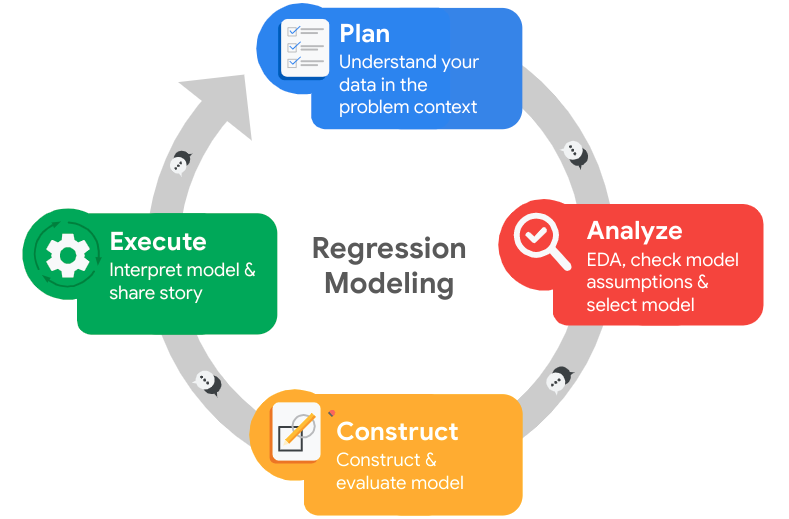

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

1. My Stakeholders are 
    - Human Resource team of Sailfort
    - Employees of Sailfort
    - Senior Management in Sailfort
2. Understand why there is such a high turnover of employees
    - Identify which features, such as monthly hours, salary, etc, are key influences in employee decision to leave
3. There are 14999 rows/entries and 10 features. Columns Department and salary would need to be further processed to numerical categories
4. Pandas documentation
5. So far there are no available information that might pose an ethical issue.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- There are no null entries in this dataset
- There are 14999 entries and 10 features
- Department and salary are object datatypes which may require conversion

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
new_cols =['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']

df0.columns = new_cols
# Display all column names after the update
### YOUR CODE HERE ###

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df_dup = df0[df0.duplicated()]
df_dup.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(ignore_index=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

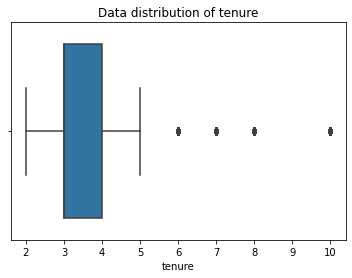

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df, x='tenure')
plt.title('Data distribution of tenure')
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3-Q1

In [13]:
tenure_outlier = ((df['tenure'] < (Q1 - 1.5 * IQR)) | (df['tenure'] > (Q3 + 1.5 * IQR))).sum()

print('There are {} outliers in the feature tenure'.format(tenure_outlier))
print('{} is the upper limit'.format(Q3+1.5*IQR))

There are 824 outliers in the feature tenure
5.5 is the upper limit


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

- There is no strong relationship between the variables
- There is a lack of normal distribution in each of the variables
- 
- Understanding what features there are, if they have any relationships with each other. how it is distributed. This helps with model selection as different models have different requirements
- Seaborn, matplotlib and pandas documentation
- None


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts(normalize=True)

0    10000
1     1991
Name: left, dtype: int64


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

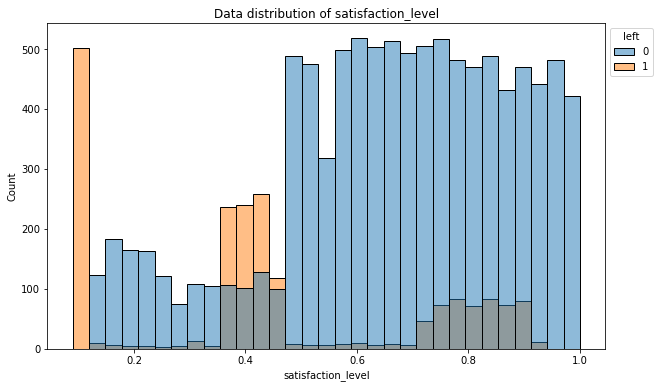

In [91]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='satisfaction_level', hue='left')
plt.title('Data distribution of satisfaction_level')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Interestingly there are some that have a higher satisfaction level (clustered around 0.8) that have left.

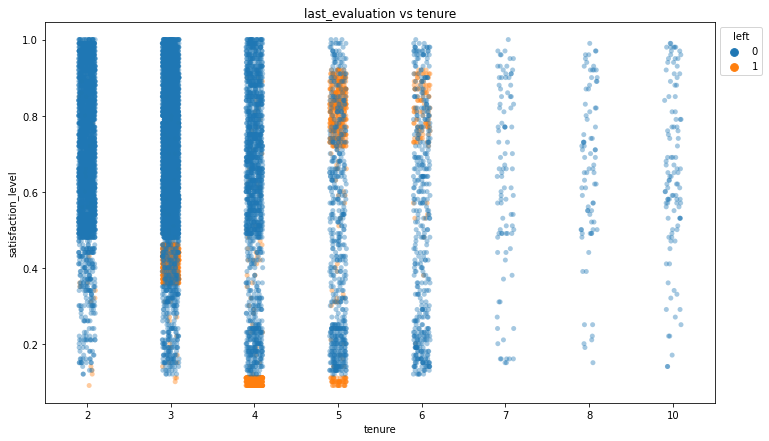

In [101]:
plt.figure(figsize=(12,7))
ax = sns.stripplot(data=df, x='tenure', y ='satisfaction_level', hue='left', alpha=0.4)
plt.title('last_evaluation vs tenure')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Those that left seem to leave by the 6 year mark. It does not seem to weigh on the satisfaction_level specifically as well. The data seems a little weirdly distributed to make sense at first glance

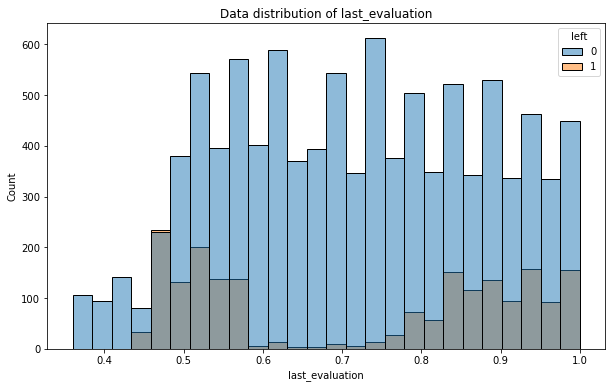

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='last_evaluation', hue='left')
plt.title('Data distribution of last_evaluation')
plt.show()

Evaluation levels peaks, for employees that left, around the higher end and around 0.5. Is this related to other factors?

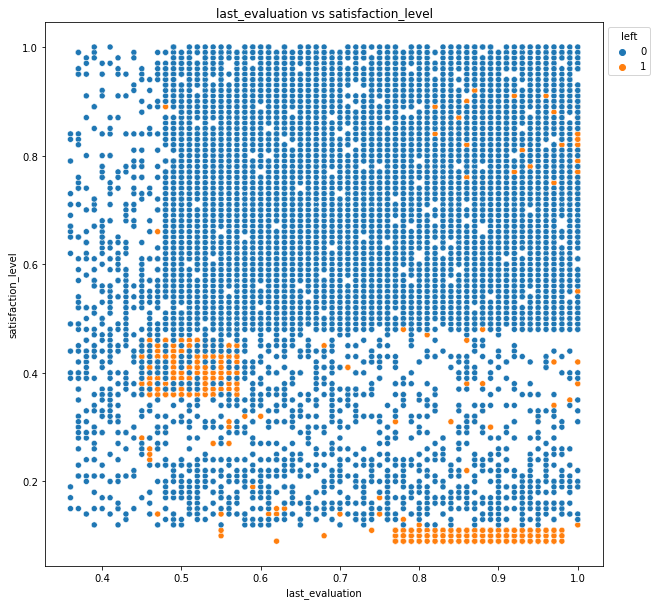

In [93]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=df, x='last_evaluation', y ='satisfaction_level', hue='left')
plt.title('last_evaluation vs satisfaction_level')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

There is 2 general chunks that can be seen of people that left. 

1 is high evaluation but low satisfaction, and there is an area with middling satisfaction level and evaluation level. 

Why did the people with high evaluation leave have such low satisfaction levels?

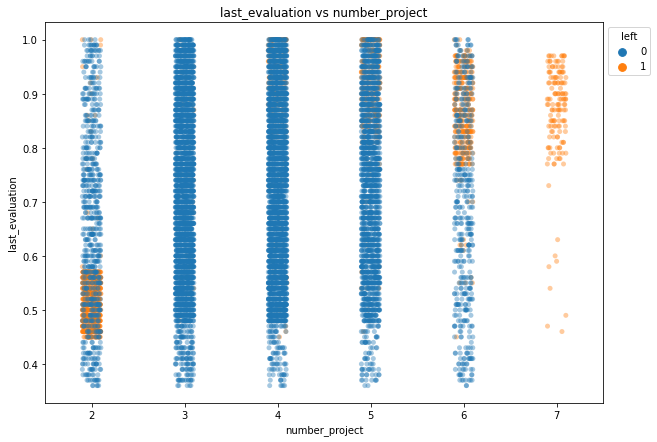

In [100]:
plt.figure(figsize=(10,7))
ax = sns.stripplot(data=df, x='number_project', y ='last_evaluation', hue='left', alpha=0.4)
plt.title('last_evaluation vs number_project')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

The clusters of those that left seem to be around high evaluation and high number of projects, as well as those with lower number of projects and middling evaluations. 

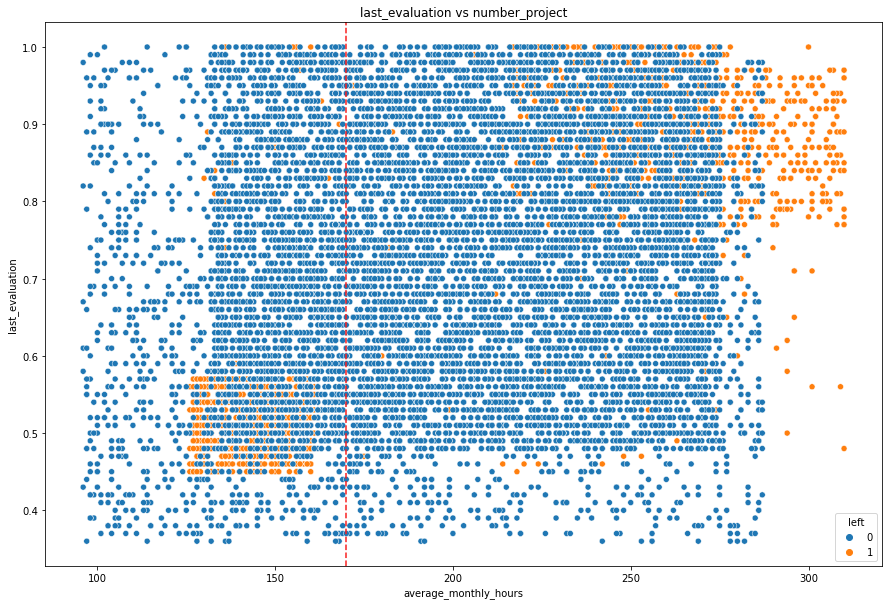

In [78]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='average_monthly_hours', y ='last_evaluation', hue='left')
plt.axvline(x=170, color='#F91E1E', ls='--')
plt.title('last_evaluation vs number_project')
plt.show()

Employees that left show 2 clusters again.

Now a high average_monthly_hours but high evaluation, and a those working normal hours but middling evaluation. 

Would now look further into number of projects and average_monthly_hours

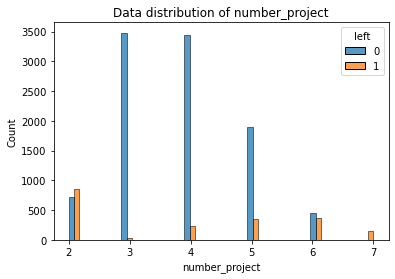

In [77]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge')
plt.title('Data distribution of number_project')
plt.show()

Seems that the proportion of people who left are higher with 2, 6 or 7 projects.

In the group of 6 & 7 projects, could they also be working longer hours?

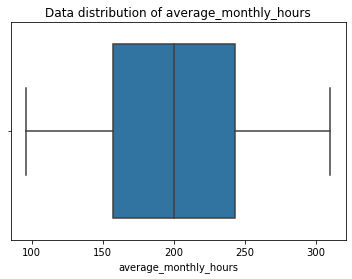

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df, x='average_monthly_hours')
plt.title('Data distribution of average_monthly_hours')
plt.show()

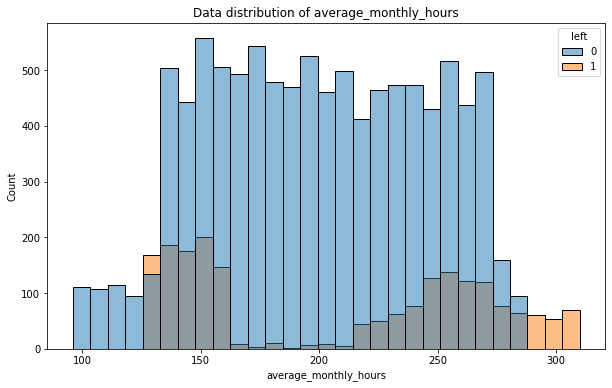

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='average_monthly_hours', hue='left')
plt.title('Data distribution of average_monthly_hours')
plt.show()

The average work hours are on the high end in this company. Considering a typical 8.5hr work day and a 5 day work week, that would amount to about 170 hrs a month.

In [22]:
over_average = len(df[df['average_monthly_hours'] >170])
pct_over = over_average / df.shape[0]
print('There are {:.2%} of employees working more than average hours'.format(pct_over))

There are 66.53% of employees working more than average hours


I want to find out if the hours worked is significantly different than the standard average hours.
*   $H_0$: There is no difference in the average_monthly_hours and the standard monthly hour of 170hrs.
*   $H_A$: There is a difference in the average_monthly_hours and the standard monthly hour of 170hrs.


In [104]:
from scipy import stats

In [105]:
std_hrs = 170
t_stat, p_value = stats.ttest_1samp(df['average_monthly_hours'], std_hrs)
print("T statistic:", t_stat)
print("P-value:", p_value)


T statistic: 68.48152583037573
P-value: 0.0


Assuming we set a significance level of 5%

In [106]:
sig = 0.05
if p_value < sig:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")


Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.


We can see that the `average_monthly_hours` worked is significantly higher than the assumed standard hours.

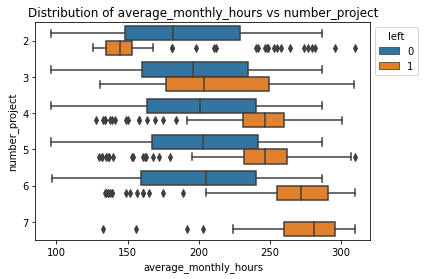

In [95]:
ax=sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h")
plt.title('Distribution of average_monthly_hours vs number_project')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

there seems to be an occurance of when there are high number of projects and long hours, more likely an employee would leave

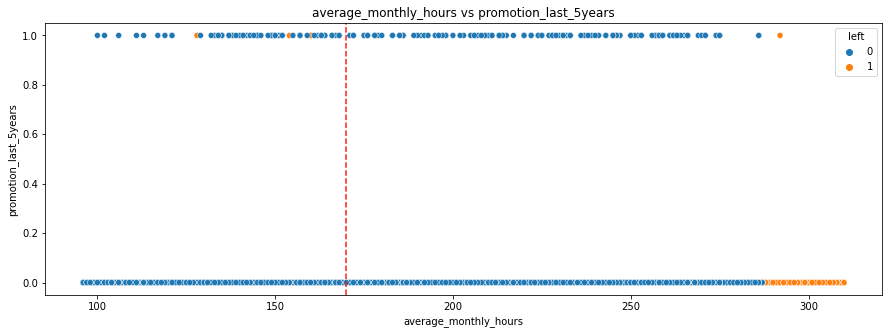

In [102]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='average_monthly_hours', y ='promotion_last_5years', hue='left')
plt.axvline(x=170, color='#F91E1E', ls='--')
plt.title('average_monthly_hours vs promotion_last_5years')
plt.show()

Most that did not get a promotion and worked the most hours left.

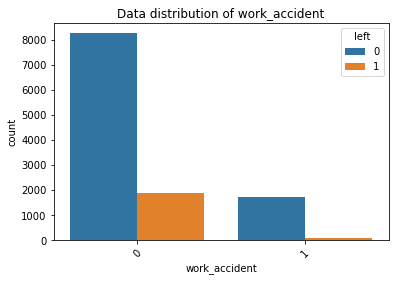

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data=df, x='work_accident', hue='left')
plt.title('Data distribution of work_accident')
plt.xticks(rotation=45)
plt.show()

work_accident does not seem to have any affect on employees leaving. Would assume that this is not going to be a high ranking feature.

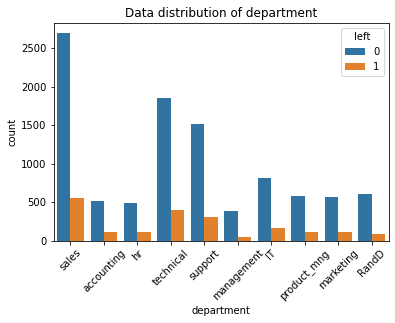

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data=df, x='department', hue='left')
plt.title('Data distribution of department')
plt.xticks(rotation=45)
plt.show()

Distribution of people who have left is evenly distributed throughout the different department types. Would assume that this is not going to be a high ranking feature.

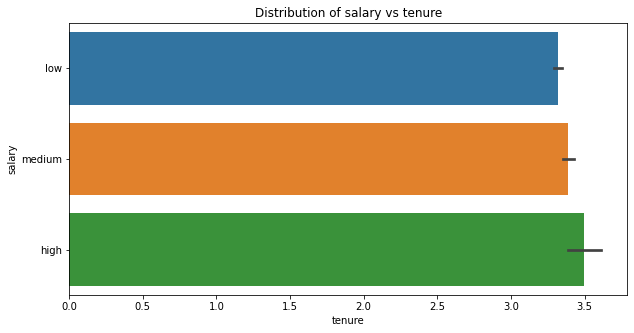

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='tenure', y='salary', hue_order=['low','medium','high'])
plt.title('Distribution of salary vs tenure')
plt.show()

Salary distribution seems to make sense with shorter tenures having lower salaries

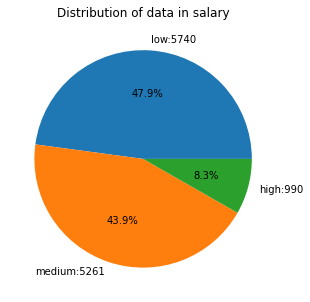

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###

fig=plt.figure(figsize=(5,5))
data=df['salary'].value_counts()
plt.pie(data,labels=[f'{data.index[0]}:{data.values[0]}'
                   , f'{data.index[1]}:{data.values[1]}'
                     ,f'{data.index[2]}:{data.values[2]}'],
       autopct='%1.1f%%')
plt.title('Distribution of data in salary')
plt.show()

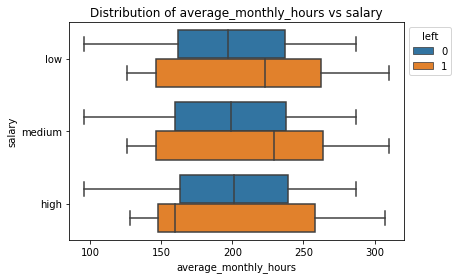

In [90]:
ax = sns.boxplot(data=df, x='average_monthly_hours', y='salary', hue='left', orient="h")
plt.title('Distribution of average_monthly_hours vs salary')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

There seems to be an equal distribution of employees who left regardless of salary level

### Data Cleaning

Convert Department and Salary to numerical catergories

In [30]:
df_sub = pd.get_dummies(df, columns=['department'],drop_first=True)
df_sub.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


In [31]:
salary_class = {'low':1,'medium':2,'high':3}
df_sub['salary']=df_sub['salary'].map(salary_class)
df_sub.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


Remove outlier from Tenure

In [32]:
df_sub['tenure'].mask(df_sub['tenure']>5.5,5.5,inplace=True)

In [33]:
df_sub['tenure'].describe()

count    11991.000000
mean         3.273455
std          1.057809
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.500000
Name: tenure, dtype: float64

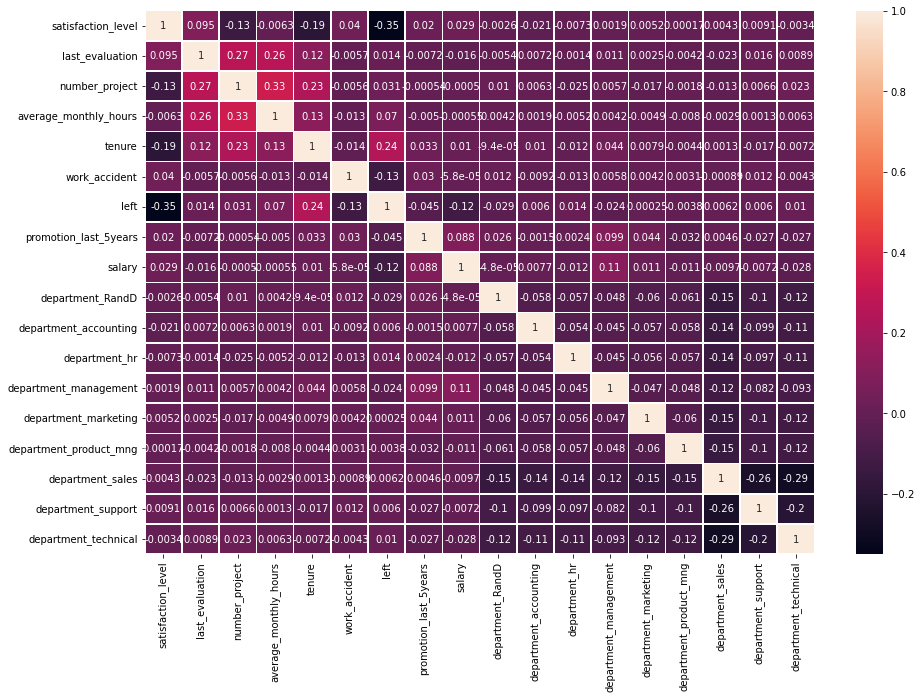

In [34]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df_sub.corr(),annot=True,linewidth=.5)

Theres some correlation with number_of_projects and average_mothly_hours

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

- No 2 native features seem to strongly correlated with each other
- Interestingly, there seem to be some with high satisfaction level that has left.
- None of the features have a normal distribution
- The department with the most personnel is Sales.
- There seems to be a relationship with average_montly hours worked, number of projects and whether or not an employee leaves.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]


1. As alluded to earlier, it was strange that some employees with high satisfaction left the company
2. Chose `left` as an independent variable as we wanted to predict which employees would likely leave the company.
3. Depending on the model, the outcome is either `left` or `retained`. No severe multicollinearity among the X variables. 
4. The Xgbclassifier model worked best on the data set. Scoring high in all the metrics measured.
5. Would like more information such as age, experience level, seniority to include in building the model. Could explore other classifying models
6. SKlearn, XGBooster documentation
7. average_monthly_hours does seem to be an important feature in determining if an employee leaves. This is something management would have to look into. Are employees having unsuitable work hours?

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

Predicting if an employee is likely to leave or not.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

A model that does classification would be required here as our output is binary, if an employee is likely or unlikely to leave.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [35]:
## Import Packages for modelling

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error, f1_score,classification_report, balanced_accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC


In [36]:
#split data
X= df_sub.drop(columns=['left'])
y = df_sub['left']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [37]:
model_acc_compile ={"Name":[],"CVS":[],"Recall":[],"Precision":[],"Accuracy":[],"f1":[],}
def performance (model,name):
    y_pred=model.predict(X_test)
    #crossvalidation scores
    kfold = KFold(10,shuffle=True,random_state=1)
    cvs = cross_val_score(model, X, y,cv=kfold)
    print('{:.3} Cross Validation score with a standard deviation of {:.2f}'.format(cvs.mean(),cvs.std()))
    acc=balanced_accuracy_score(y_test,y_pred)
    print("Accuracy of the model is: {:.3}".format(acc))
    rec=recall_score(y_test,y_pred)
    print("Recall score of the model is: {:.3}".format(acc))   
    prec=precision_score(y_test,y_pred)
    print("Recall score of the model is: {:.3}".format(acc))  
    f1s=f1_score(y_test,y_pred,average='weighted')
    print('f1 score of {:.2} with a standard deviation of {:.2f}'.format(f1s.mean(),f1s.std()))
    cmx=confusion_matrix(y_test,y_pred)
    model_acc_compile["Name"].append(name)
    model_acc_compile["CVS"].append(cvs.mean())
    model_acc_compile["Recall"].append(rec.mean())
    model_acc_compile["Precision"].append(prec.mean())    
    model_acc_compile["Accuracy"].append(acc)
    model_acc_compile["f1"].append(f1s.mean())
    cmlabel = ['Retain','Left']
    disp = ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=cmlabel)
    disp.plot(values_format='d')
    plt.show()

### Logistic Regression

In [38]:
### YOUR CODE HERE ###
log = LogisticRegression(solver='liblinear')
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
log.intercept_

array([-0.38614724])

In [40]:
pd.Series(log.coef_[0],index=X.columns)

satisfaction_level       -3.650564
last_evaluation           0.379072
number_project           -0.318566
average_monthly_hours     0.003651
tenure                    0.604992
work_accident            -1.429006
promotion_last_5years    -0.502973
salary                   -0.641862
department_RandD         -0.505326
department_accounting     0.102120
department_hr             0.120935
department_management    -0.313394
department_marketing      0.128399
department_product_mng   -0.003861
department_sales          0.097028
department_support        0.002916
department_technical      0.087554
dtype: float64

0.823 Cross Validation score with a standard deviation of 0.01
Accuracy of the model is: 0.565
Recall score of the model is: 0.565
Recall score of the model is: 0.565
f1 score of 0.79 with a standard deviation of 0.00


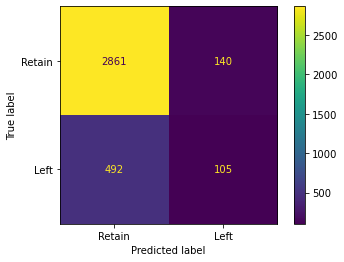

In [41]:
performance(log,'LogReg')

### Gaussian Naive Bayes

In [42]:
%%time
nb=GaussianNB()
nb.fit(X_train, y_train)

CPU times: user 4.4 ms, sys: 79 µs, total: 4.48 ms
Wall time: 3.76 ms


GaussianNB(priors=None, var_smoothing=1e-09)

0.828 Cross Validation score with a standard deviation of 0.01
Accuracy of the model is: 0.794
Recall score of the model is: 0.794
Recall score of the model is: 0.794
f1 score of 0.85 with a standard deviation of 0.00


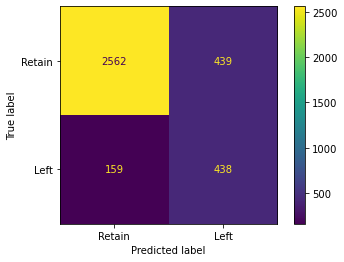

In [43]:
performance(nb,'GaussianNB')

### Random Forest

In [44]:
rf = RandomForestClassifier(random_state=42)
# cv_params = {'max_depth': [None, 10, 20, 30],
#              'max_features': [1.0,'sqrt',5],
#              'min_samples_leaf': [1,2,5],
#              'max_samples':[0.5,0.75,1.0],
#              'min_samples_split': [2,5,10],
#              'n_estimators': [50, 150,300],
#              }
## Ran code on Colab for faster performance and got the following as "best parameters"
cv_params = {'max_depth': [10],
             'max_features': [1.0],
             'min_samples_leaf': [1],
             'max_samples':[1],
             'min_samples_split': [10],
             'n_estimators': [50],
             }


scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [45]:
%%time

rf_cv.fit(X_train,y_train)

CPU times: user 427 ms, sys: 0 ns, total: 427 ms
Wall time: 426 ms


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

0.834 Cross Validation score with a standard deviation of 0.01
Accuracy of the model is: 0.5
Recall score of the model is: 0.5
Recall score of the model is: 0.5
f1 score of 0.76 with a standard deviation of 0.00


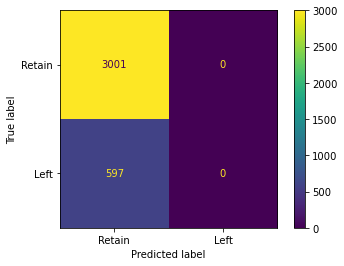

In [46]:
performance(rf_cv.best_estimator_,'RandomForest_CV')

### XGBoost

In [47]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'max_depth': [3,5,7,9], 
             'min_child_weight': [1,3,5],
             'learning_rate': [0.1, 0.3, 0.5],
             'n_estimators': [50, 100, 300]
             }

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [48]:
%%time

xgb_cv.fit(X_train, y_train)

CPU times: user 10min 41s, sys: 3.32 s, total: 10min 45s
Wall time: 5min 25s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

0.982 Cross Validation score with a standard deviation of 0.00
Accuracy of the model is: 0.961
Recall score of the model is: 0.961
Recall score of the model is: 0.961
f1 score of 0.98 with a standard deviation of 0.00


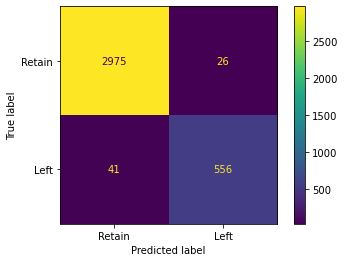

In [49]:
performance(xgb_cv.best_estimator_,'XGB_CV')

### SVM

In [51]:
%%time
svc=SVC(class_weight='balanced', random_state=42)   

svc.fit(X_train,y_train) 

CPU times: user 3.89 s, sys: 160 ms, total: 4.05 s
Wall time: 4.05 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

0.685 Cross Validation score with a standard deviation of 0.01
Accuracy of the model is: 0.673
Recall score of the model is: 0.673
Recall score of the model is: 0.673
f1 score of 0.71 with a standard deviation of 0.00


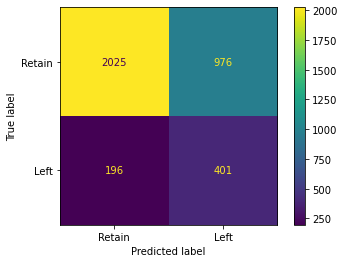

In [52]:
performance(svc,'SVC')

### Comparing Models

In [53]:
model_compare = pd.DataFrame.from_dict(model_acc_compile, orient='columns')
model_compare

,Name,CVS,Recall,Precision,Accuracy,f1
0,LogReg,0.822617,0.175879,0.428571,0.564614,0.792496
1,GaussianNB,0.827789,0.733668,0.499430,0.793692,0.845516
2,RandomForest_CV,0.833959,0.000000,0.000000,0.500000,0.758617
3,XGB_CV,0.982070,0.931323,0.955326,0.961330,0.981283
4,SVC,0.684764,0.671692,0.291213,0.673233,0.714291


In [54]:
compare_melt = pd.melt(model_compare,id_vars=['Name'],value_vars=['CVS','Recall','Precision','Accuracy','f1'])
compare_melt['value']=round(compare_melt['value']*100,2)
compare_melt.head()

,Name,variable,value
0,LogReg,CVS,82.26
1,GaussianNB,CVS,82.78
2,RandomForest_CV,CVS,83.40
3,XGB_CV,CVS,98.21
4,SVC,CVS,68.48


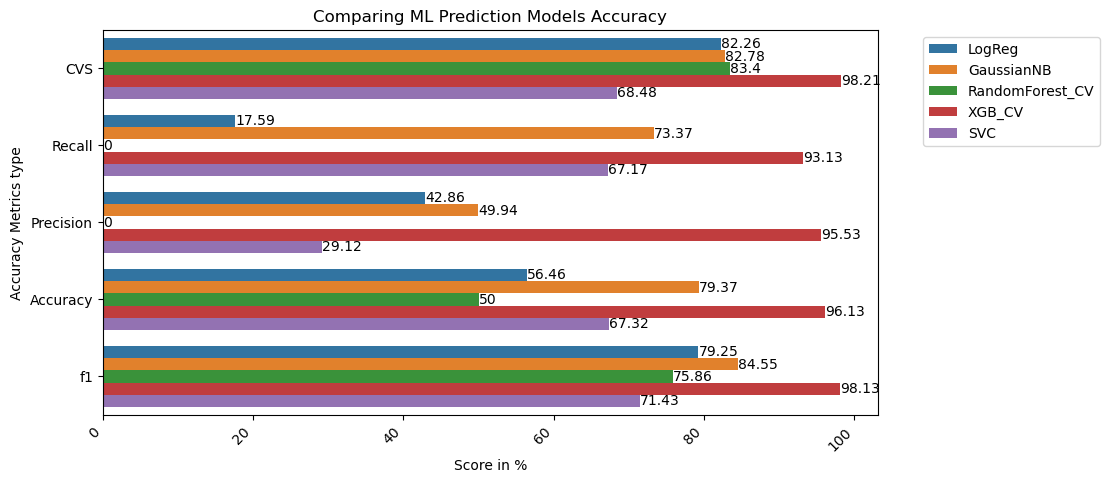

In [6]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=compare_melt,x='value',y='variable',hue='Name')
plt.xticks(rotation=45,horizontalalignment='right')
plt.title("Comparing ML Prediction Models Accuracy")
plt.xlabel('Score in %')
plt.ylabel('Accuracy Metrics type')
plt.legend(bbox_to_anchor=(1.05,1),loc=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Feature Importance

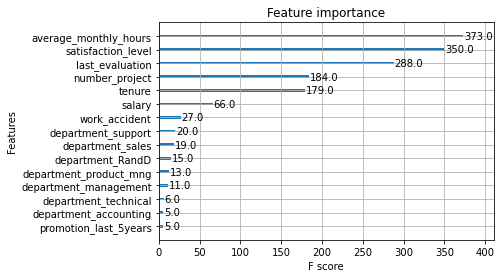

In [57]:
plot_importance(xgb_cv.best_estimator_)
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.


- The top 5 features that influences an employee's continued employment are
    - average_monthly_hours
    - satisfaction_level
    - last_evaluation
    - number_project
    - tenure
- It does seem that `average_monthly_hours` is one of the top features influencing an employee's decision to stay. And numberThis confirms our assumptions during the EDA.
- As the XGBoost model scored well in the metrics measured, the features predicted would give strong confidence on their accuracy. My findings show that `average_monthly_hours` influenced heavily on an employee's decision to stay. `satisfaction_level` and `last_evaluation` are also ranked 2 and 3, but as we had discovered earlier that these 2 features are heavily influenced by `number_project` and `average_monthly_hours`
- Yes, with more data and feature engineering with that data, we could possibly improve the scores in models like Random Forest where there is a more definitive idea on how the features affect the positive or negative influence on an employee's decision to leave.
- Could look into collating somemore data that could help contribute better to the accuracy of the prediction, like amount of overtime done, average daily hours and weekly hours.Seniority levels, experience levels.
- SKlearn and XGBooster documentation
- `average_monthly_hours` does seem to be an important feature in determining if an employee leaves. This is something management would have to look into. Are employees having unsuitable work hours?
    

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]


- Tested 5 models to predict if an employee is likely to leave.
- XGB came out on top with high scores across the board of all measured metrics.
- The top 5 features that influences an employee's continued employment are
    - average_monthly_hours
    - satisfaction_level
    - last_evaluation
    - number_project
    - tenure
- We could consider collecting more information such as amount of overtime done, average daily hours and weekly hours.
- We could also consider trying other classification models to find a model that is able to explain the feature importance in a more descriptive manner.
- Management needs to ensure the hours worked by employees are closer to the average of 170hrs. As with a 5% significance level we have determined that the hours worked is __significantly__ different from the standard average monthly hours

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

- XGB was the best model out of 5 tested
- The top 5 features that influences an employee's continued employment are
    - average_monthly_hours
    - satisfaction_level
    - last_evaluation
    - number_project
    - tenure
- There is a need to ensure that the `average_monthly_hours` worked is closer to standard average. Is there a manpower issue? Are deadlines not set with proper consideration? Or is there a work culture that needs to be adjusted. Promote a better work-life-balance.
- Employees who are assigned a large number of projects (6 and above) are more likely to leave, ensure that there is a maximum number of projects that an employee is assigned to.
- Proper recognition of employees' efforts through promotion should be done.
- More data can be collected, such as specific manager names, staff seniority, staff experience, amount of overtime done, average daily hours and weekly hours
- The model can also be improved by introducing new data and looking at different models that can give a more detailed breakdown on how the features influences the employee's decision to leave

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.